In [25]:
%pip install pandas
import pandas as pd 

data = pd.read_csv('./reviews.csv')
data = data.head(30000)
data.tail()

Note: you may need to restart the kernel to use updated packages.


,Time_submitted,Review,Rating,Total_thumbsup,Reply
29995,2022-04-23 20:03:35,"When I play music on my playstation (4 and 5),...",3,0,NaN
29996,2022-04-23 19:51:42,Absolutely brilliant Playlists,5,0,NaN
29997,2022-04-23 19:49:46,what is this behavior spotify...??? every time...,1,0,NaN
29998,2022-04-23 19:45:41,Great interface and setup...,5,0,NaN
29999,2022-04-23 19:42:41,this app is so trash. it is impossible to do a...,1,4,NaN


In [26]:
data.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             29927
dtype: int64

In [27]:
data.drop(['Time_submitted', 'Reply'], axis = 1, inplace = True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

/var/folders/l7/d0s506nd63lg66s2ty4wc8_00000gp/T/ipykernel_55496/3918982900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Rating', data=data, palette = 'pastel')


<Axes: xlabel='Rating', ylabel='count'>

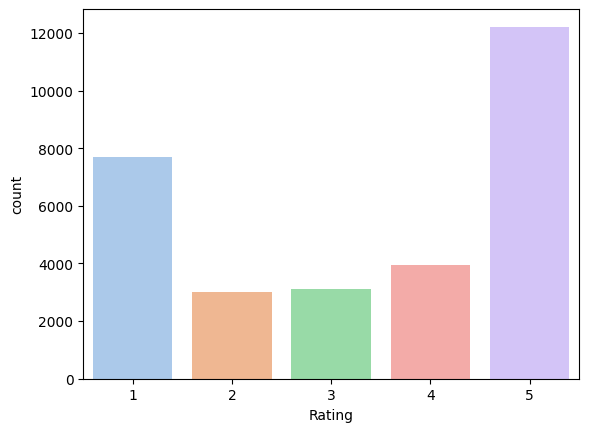

In [28]:
import seaborn as sns 
sns.countplot(x = 'Rating', data=data, palette = 'pastel')

In [29]:
def transform_ratings(rating) : 
    if rating == 5 or rating == 4 : 
        return "Good"
    if rating == 3 : 
        return "Neutral" 
    if rating == 2 or rating == 1 :
        return "Bad"

/var/folders/l7/d0s506nd63lg66s2ty4wc8_00000gp/T/ipykernel_55496/1248267072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Desc', data = data, palette = 'pastel')


,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


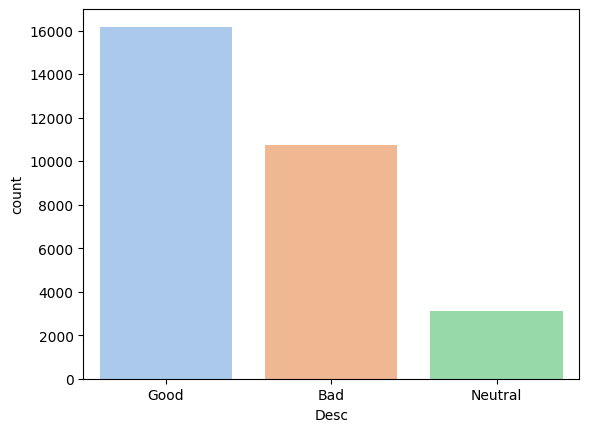

In [30]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x = 'Desc', data = data, palette = 'pastel')
data.head()

<Axes: xlabel='length', ylabel='Total_thumbsup'>

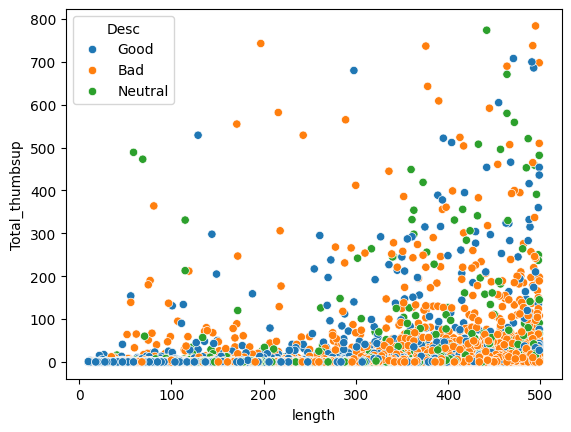

In [31]:
sns.scatterplot(x = data['length'][data.length < 500], y = data ['Total_thumbsup'][data.Total_thumbsup < 800], hue = data['Desc'])

Note: you may need to restart the kernel to use updated packages.


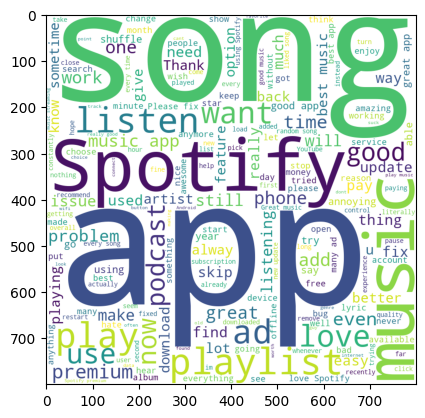

In [32]:
%pip install wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

reviews = " ".join(data.loc[:, 'Review'])
wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', min_font_size= 10).generate(reviews)
plt.imshow(wordcloud)


In [33]:
import re 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda x : " ".join(x.lower() for x in x.split()))
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

stop_words = stopwords.words('english')
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word : " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))

data.head()["Review"]

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500,), (7500,), (22500,), (7500,))

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train) 
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 3238)	1
  (0, 3300)	2
  (0, 3915)	1
  (0, 5312)	1
  (0, 5667)	1
  (0, 5770)	1
  (0, 5771)	1
  (0, 8339)	1
  (0, 9393)	1
  (0, 9775)	1
  (0, 9847)	1
  (1, 795)	1
  (1, 1131)	1
  (1, 3698)	1
  (1, 4171)	1
  (1, 4487)	1
  (1, 5098)	1
  (1, 7952)	1
  (1, 11212)	1
  (2, 668)	1
  (2, 2147)	1
  (2, 3861)	1
  (2, 4517)	1
  (2, 5187)	1
  (2, 5412)	1
  :	:
  (22497, 6871)	1
  (22497, 7674)	2
  (22497, 7708)	1
  (22497, 8502)	1
  (22497, 8997)	1
  (22497, 9127)	1
  (22497, 9393)	3
  (22497, 9923)	1
  (22497, 10305)	1
  (22497, 10874)	1
  (22497, 11454)	1
  (22498, 3270)	1
  (22498, 3544)	1
  (22498, 4590)	1
  (22498, 5418)	1
  (22498, 7229)	1
  (22498, 8197)	1
  (22498, 9256)	1
  (22498, 10339)	1
  (22499, 1464)	1
  (22499, 2143)	1
  (22499, 4427)	1
  (22499, 5372)	1
  (22499, 6567)	1
  (22499, 7133)	1


In [37]:
tfidf = TfidfVectorizer(analyzer= 'char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train) 
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 303)	0.13062889925880847
  (0, 316)	0.1712225222557342
  (0, 353)	0.04249032092974382
  (0, 358)	0.07179335361775789
  (0, 424)	0.04886500078711701
  (0, 436)	0.06919343436889701
  (0, 463)	0.06919343436889701
  (0, 468)	0.08474482452286002
  (0, 482)	0.07072256753028539
  (0, 485)	0.16104137891450937
  (0, 624)	0.08419947742501467
  (0, 644)	0.04043673293102344
  (0, 649)	0.10611744645593456
  (0, 2395)	0.08888474294974069
  (0, 2396)	0.10599762705138593
  (0, 2443)	0.16572010094758846
  (0, 2448)	0.12305801650711094
  (0, 2639)	0.04611449872614155
  (0, 2657)	0.06501396441420682
  (0, 3124)	0.06251987851784717
  (0, 3138)	0.09719271966355901
  (0, 3203)	0.06227935094748998
  (0, 3204)	0.06591831490831097
  (0, 3348)	0.06667807773285328
  (0, 3363)	0.09268190306670897
  :	:
  (22499, 4603)	0.11669344726713388
  (22499, 5311)	0.10379024078694296
  (22499, 5395)	0.12304548063676565
  (22499, 5398)	0.28783509875856894
  (22499, 5680)	0.08336144730361146
  (22499, 5700)	0.2000807786

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors : {rf_cv}')


Random Forest Classifier on Count Vectors : 0.7702666666666667


In [39]:
rf2 = RandomForestClassifier()
rf2.fit (X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF : {rf_tfidf}')

Random Forest Classifier on TF-IDF : 0.7562666666666666


In [40]:
from sklearn.naive_bayes import  MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV : {mnb_cv}')

M Naive Bayes Classifier on CV : 0.7758666666666667


In [41]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF : {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF : 0.7593333333333333


In [42]:
model = {'Model' : ['RF-Count', 'RF-TFIDF', 'MNB-Count', 'MNB-TFIDF'],
        'Score' : [rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]}
model_df = pd.DataFrame(model)
model_df 

,Model,Score
0,RF-Count,0.770267
1,RF-TFIDF,0.756267
2,MNB-Count,0.775867
3,MNB-TFIDF,0.759333


<Axes: xlabel='Score', ylabel='Model'>

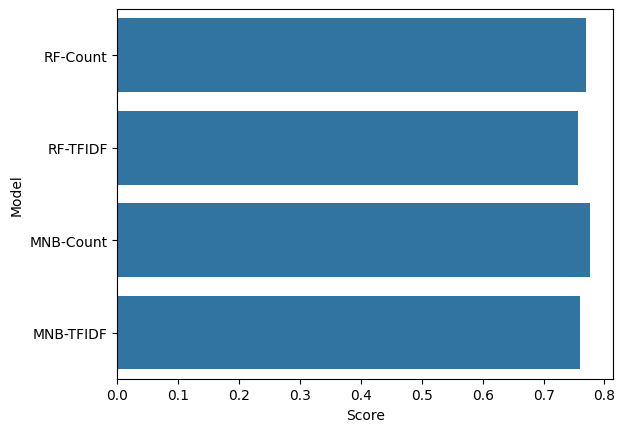

In [43]:
sns.barplot(data = model_df, y='Model', x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

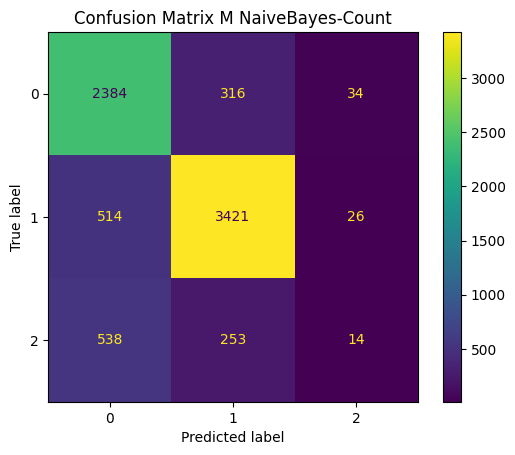

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [45]:
import pickle

with open('model.pkl' , 'wb') as f :
    pickle.dump(mnb1, f)
with open('transformer.pkl', 'wb') as f :
    pickle.dump(cv, f)
with open('le.pkl', 'wb') as f :
    pickle.dump(le, f)

In [46]:
test_reviews = ['This is a great app!', 'No control options from my phones', 'I like the song selection, but the ads are annoying', 'bad ui']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [48]:
result = pd.DataFrame({'Reviews' : test_reviews, 'Outcome' : pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad


/var/folders/l7/d0s506nd63lg66s2ty4wc8_00000gp/T/ipykernel_55496/2110540538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data = result, palette = 'pastel')


<Axes: xlabel='Outcome', ylabel='count'>

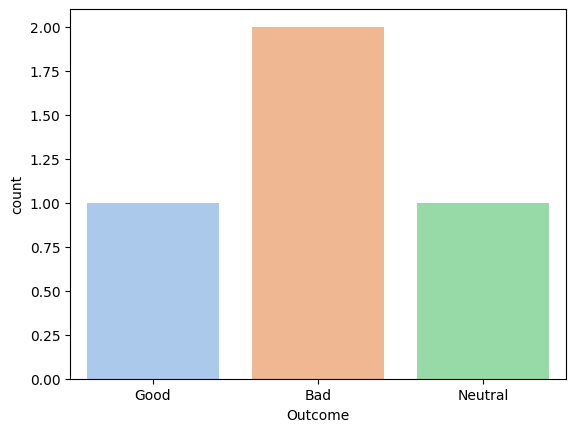

In [49]:
sns.countplot(x='Outcome', data = result, palette = 'pastel')